In [38]:
import warnings
warnings.filterwarnings("ignore")


# Insurance dataset

In [39]:
import pandas as pd
#from google.colab import drive


#drive.mount('/content/drive')


data = pd.read_csv(r'C:\Users\vessy\OneDrive\Desktop\Sweden\Thesis\IBM Watson\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [41]:
data.isnull().sum() #no missing values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

The dataset above consists of 22 features. Overall there are 24 columns and 9134 observations. There are no missing values in the data.

## Exploratory Data Analysis

## Distribution of numerical variables

The plots below show the distribution of the numerical values in the data.

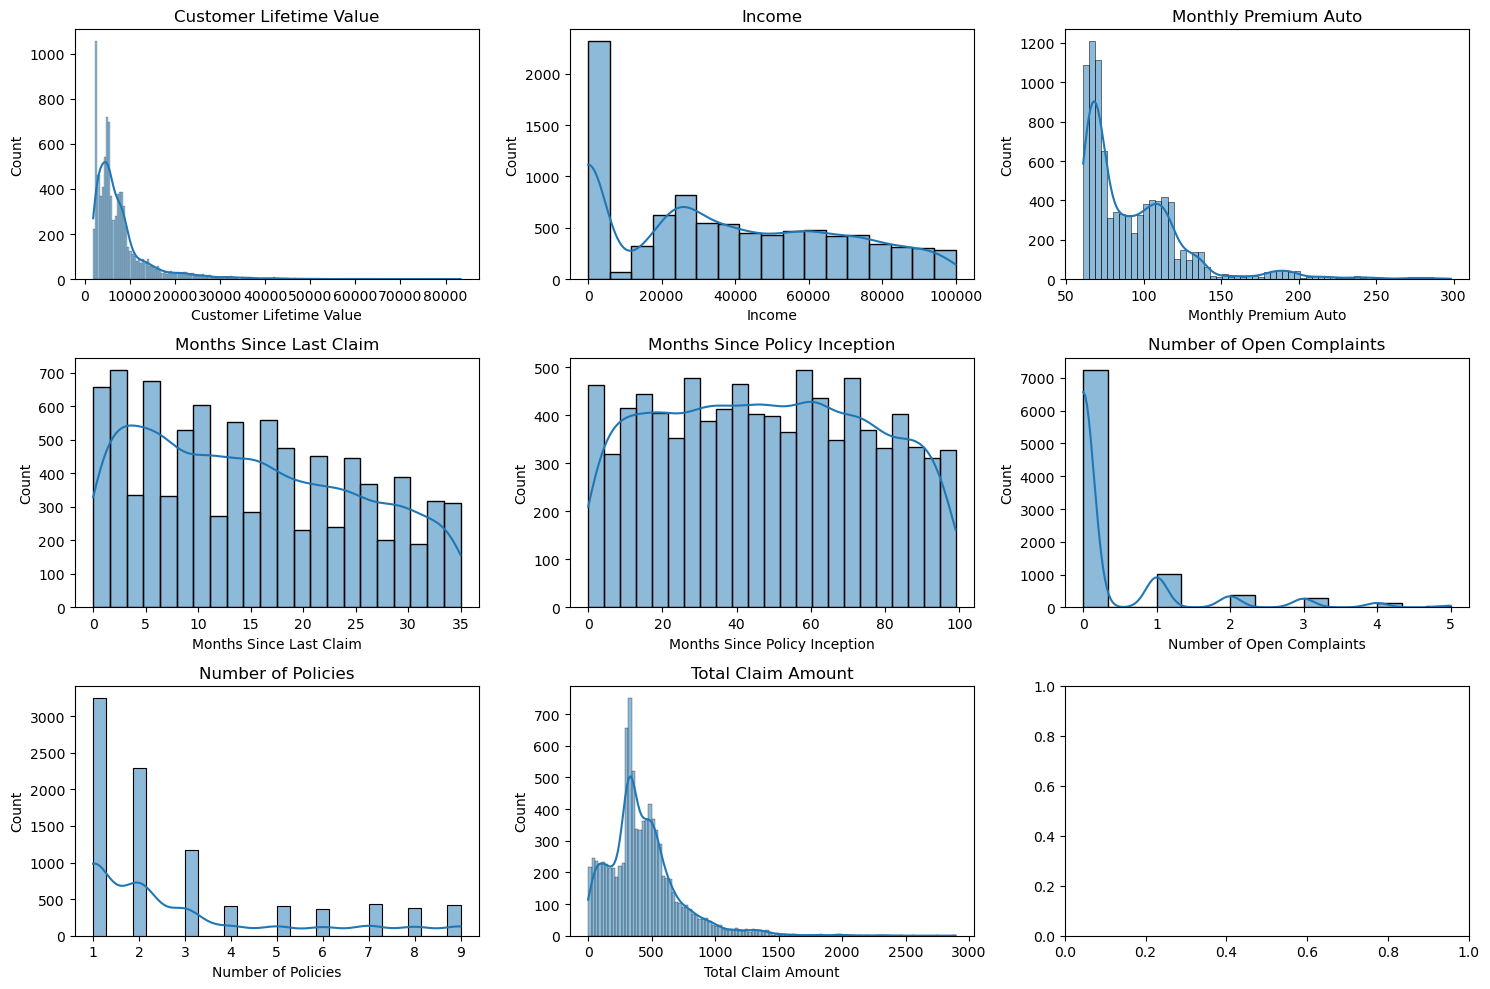

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=['float64', 'int64'])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(numerical_features.columns):
    sns.histplot(data[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

### Checking the log-scale

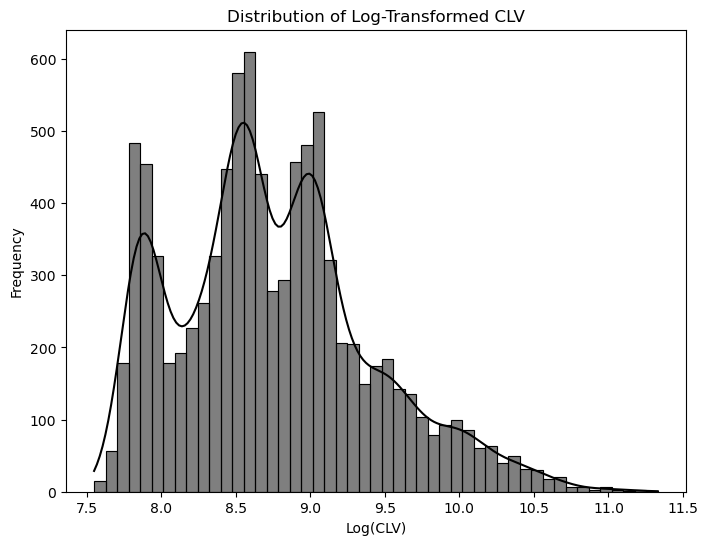

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data['Log_CLV'] = np.log1p(data['Customer Lifetime Value'])  

plt.figure(figsize=(8, 6))
sns.histplot(data['Log_CLV'], kde=True, color='black')
plt.title('Distribution of Log-Transformed CLV')
plt.xlabel('Log(CLV)')
plt.ylabel('Frequency')
plt.show()

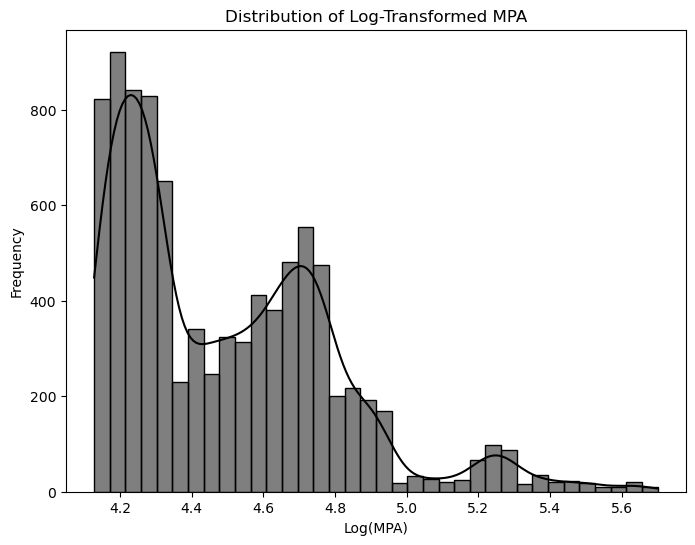

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data['Log_Monthly Premium Auto'] = np.log1p(data['Monthly Premium Auto'])  

plt.figure(figsize=(8, 6))
sns.histplot(data['Log_Monthly Premium Auto'], kde=True, color='black')
plt.title('Distribution of Log-Transformed MPA')
plt.xlabel('Log(MPA)')
plt.ylabel('Frequency')
plt.show()

We checked the log-transformation of the CLV variable, as well as the Monthly Premium Auto, since they were right-skewed. However, after applying the log-scale, there doesn't seem to be a major difference in the distribution.Therefore, the log-scale does not have a significant impact on the distribution.

## Distribution of categorical variables


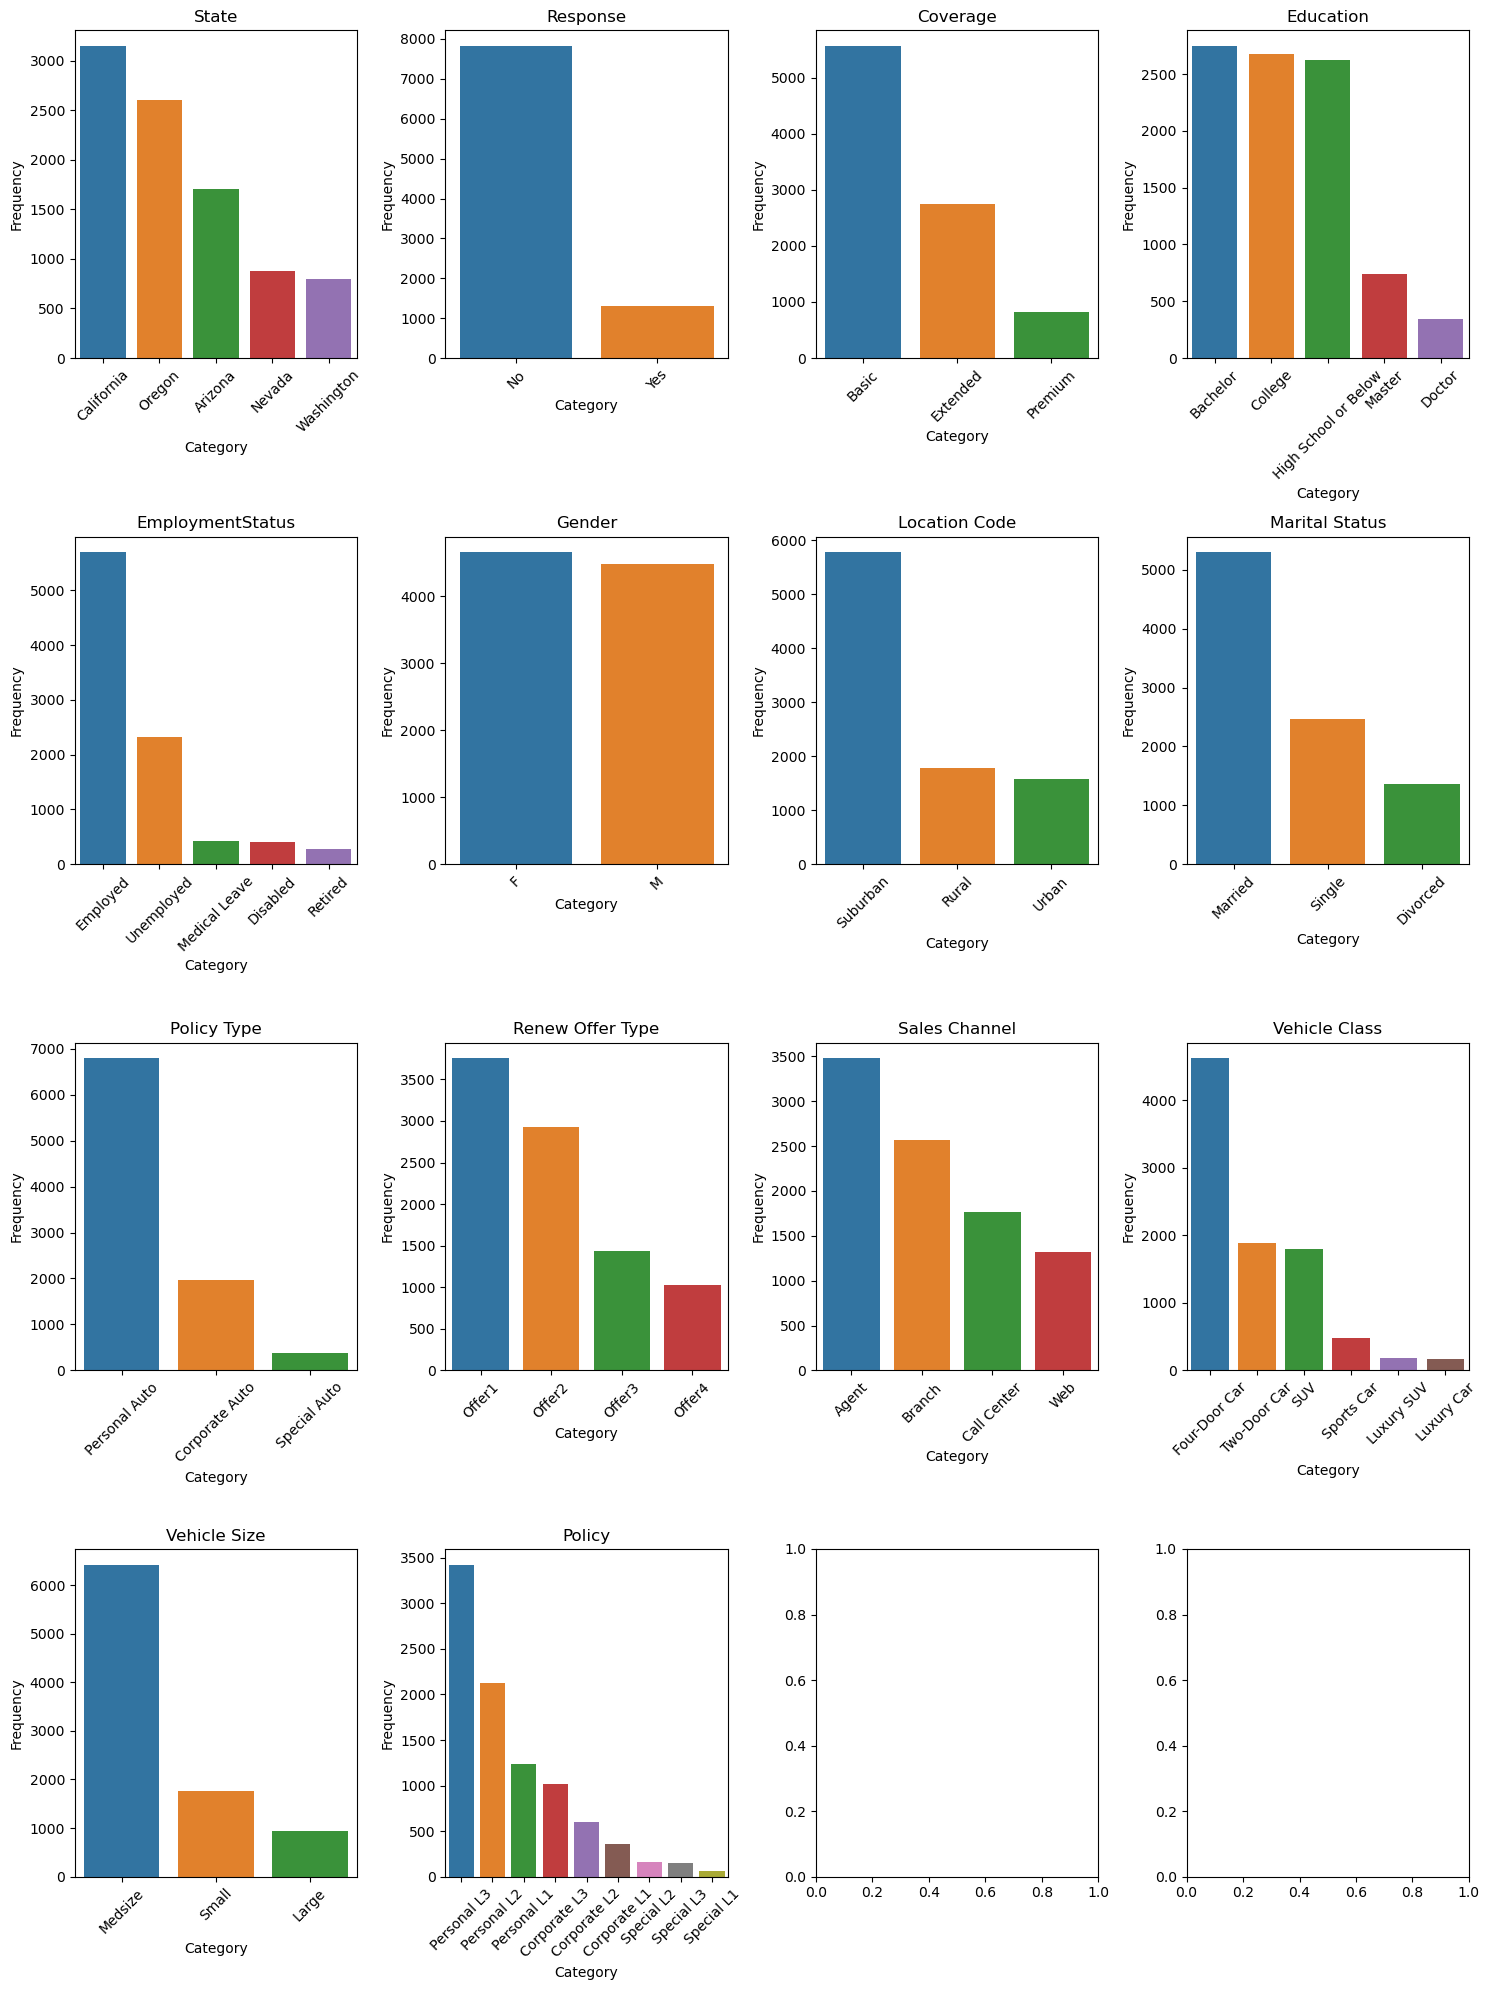

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
                    'Location Code', 'Marital Status', 'Policy Type', 
                    'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Policy']

# Subplots of 3
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

axs = axs.flatten()

for i, var in enumerate(categorical_vars):
    category_counts = data[var].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('Category')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticklabels(category_counts.index, rotation=45)

plt.tight_layout()
plt.show()

To make the plot more clear, we have plotted the distribution of policy below.

In [47]:
# Frequency tables
import pandas as pd
from tabulate import tabulate

categorical_vars = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
                    'Location Code', 'Marital Status', 'Policy Type', 
                    'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Policy']

frequency_tables = {}

for var in categorical_vars:
    frequency_table = data[var].value_counts().reset_index()
    frequency_table.columns = [var, 'Frequency']
    frequency_tables[var] = frequency_table

for var, table in frequency_tables.items():
    print(f"Frequency table for {var}:")
    print(tabulate(table, headers='keys', tablefmt='fancy_grid'))
    print()

Frequency table for State:
╒════╤════════════╤═════════════╕
│    │ State      │   Frequency │
╞════╪════════════╪═════════════╡
│  0 │ California │        3150 │
├────┼────────────┼─────────────┤
│  1 │ Oregon     │        2601 │
├────┼────────────┼─────────────┤
│  2 │ Arizona    │        1703 │
├────┼────────────┼─────────────┤
│  3 │ Nevada     │         882 │
├────┼────────────┼─────────────┤
│  4 │ Washington │         798 │
╘════╧════════════╧═════════════╛

Frequency table for Response:
╒════╤════════════╤═════════════╕
│    │ Response   │   Frequency │
╞════╪════════════╪═════════════╡
│  0 │ No         │        7826 │
├────┼────────────┼─────────────┤
│  1 │ Yes        │        1308 │
╘════╧════════════╧═════════════╛

Frequency table for Coverage:
╒════╤════════════╤═════════════╕
│    │ Coverage   │   Frequency │
╞════╪════════════╪═════════════╡
│  0 │ Basic      │        5568 │
├────┼────────────┼─────────────┤
│  1 │ Extended   │        2742 │
├────┼────────────┼────────

After looking at the distirbutions of the categorical variables and their frequency tables, we can see that some of the classes in them are not balanced. 

We looked at the classes that can be merged together and we have decided to group the following:
- 'Master' and 'Doctor' as 'Master or above' category
- 'Medical', 'Disabled' and 'Retired' as 'Others (since Employed and Unemployed are the most frequent classes in the data.

### Merging

In [48]:
import pandas as pd

                  
data['Education'] = data['Education'].replace({'Master': 'Master or above', 'Doctor': 'Master or above'})

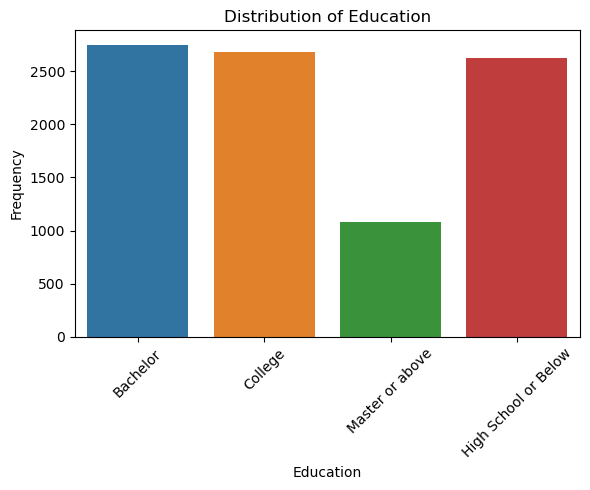

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

var = 'Education'

# Create a bar plot
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x=var)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

data['EmploymentStatus'] = data['EmploymentStatus'].replace({'Medical Leave': 'Others', 'Retired':'Others', 'Disabled': 'Others'})
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV,Log_Monthly Premium Auto
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924622,4.248495
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850881,4.553877
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464085,4.691348
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.942051,4.672829
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942608,4.304065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10.060790,4.304065
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,8.038354,4.382027
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,9.007599,4.454347
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,8.926045,4.574711


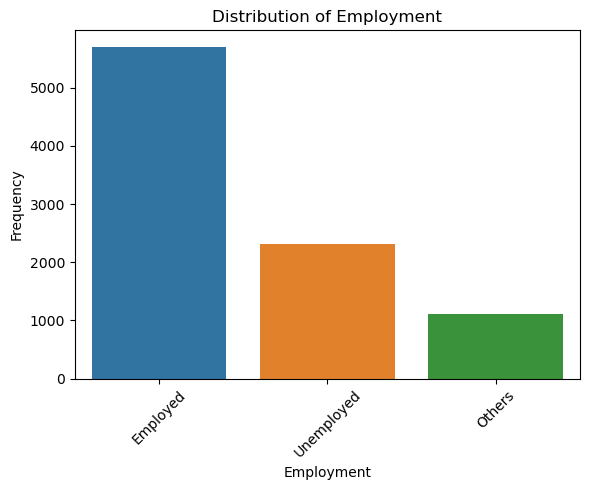

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

var2 = 'EmploymentStatus'

# Create a bar plot
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x=var2)
plt.title('Distribution of Employment')
plt.xlabel('Employment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Checking boxplots for outliers and means

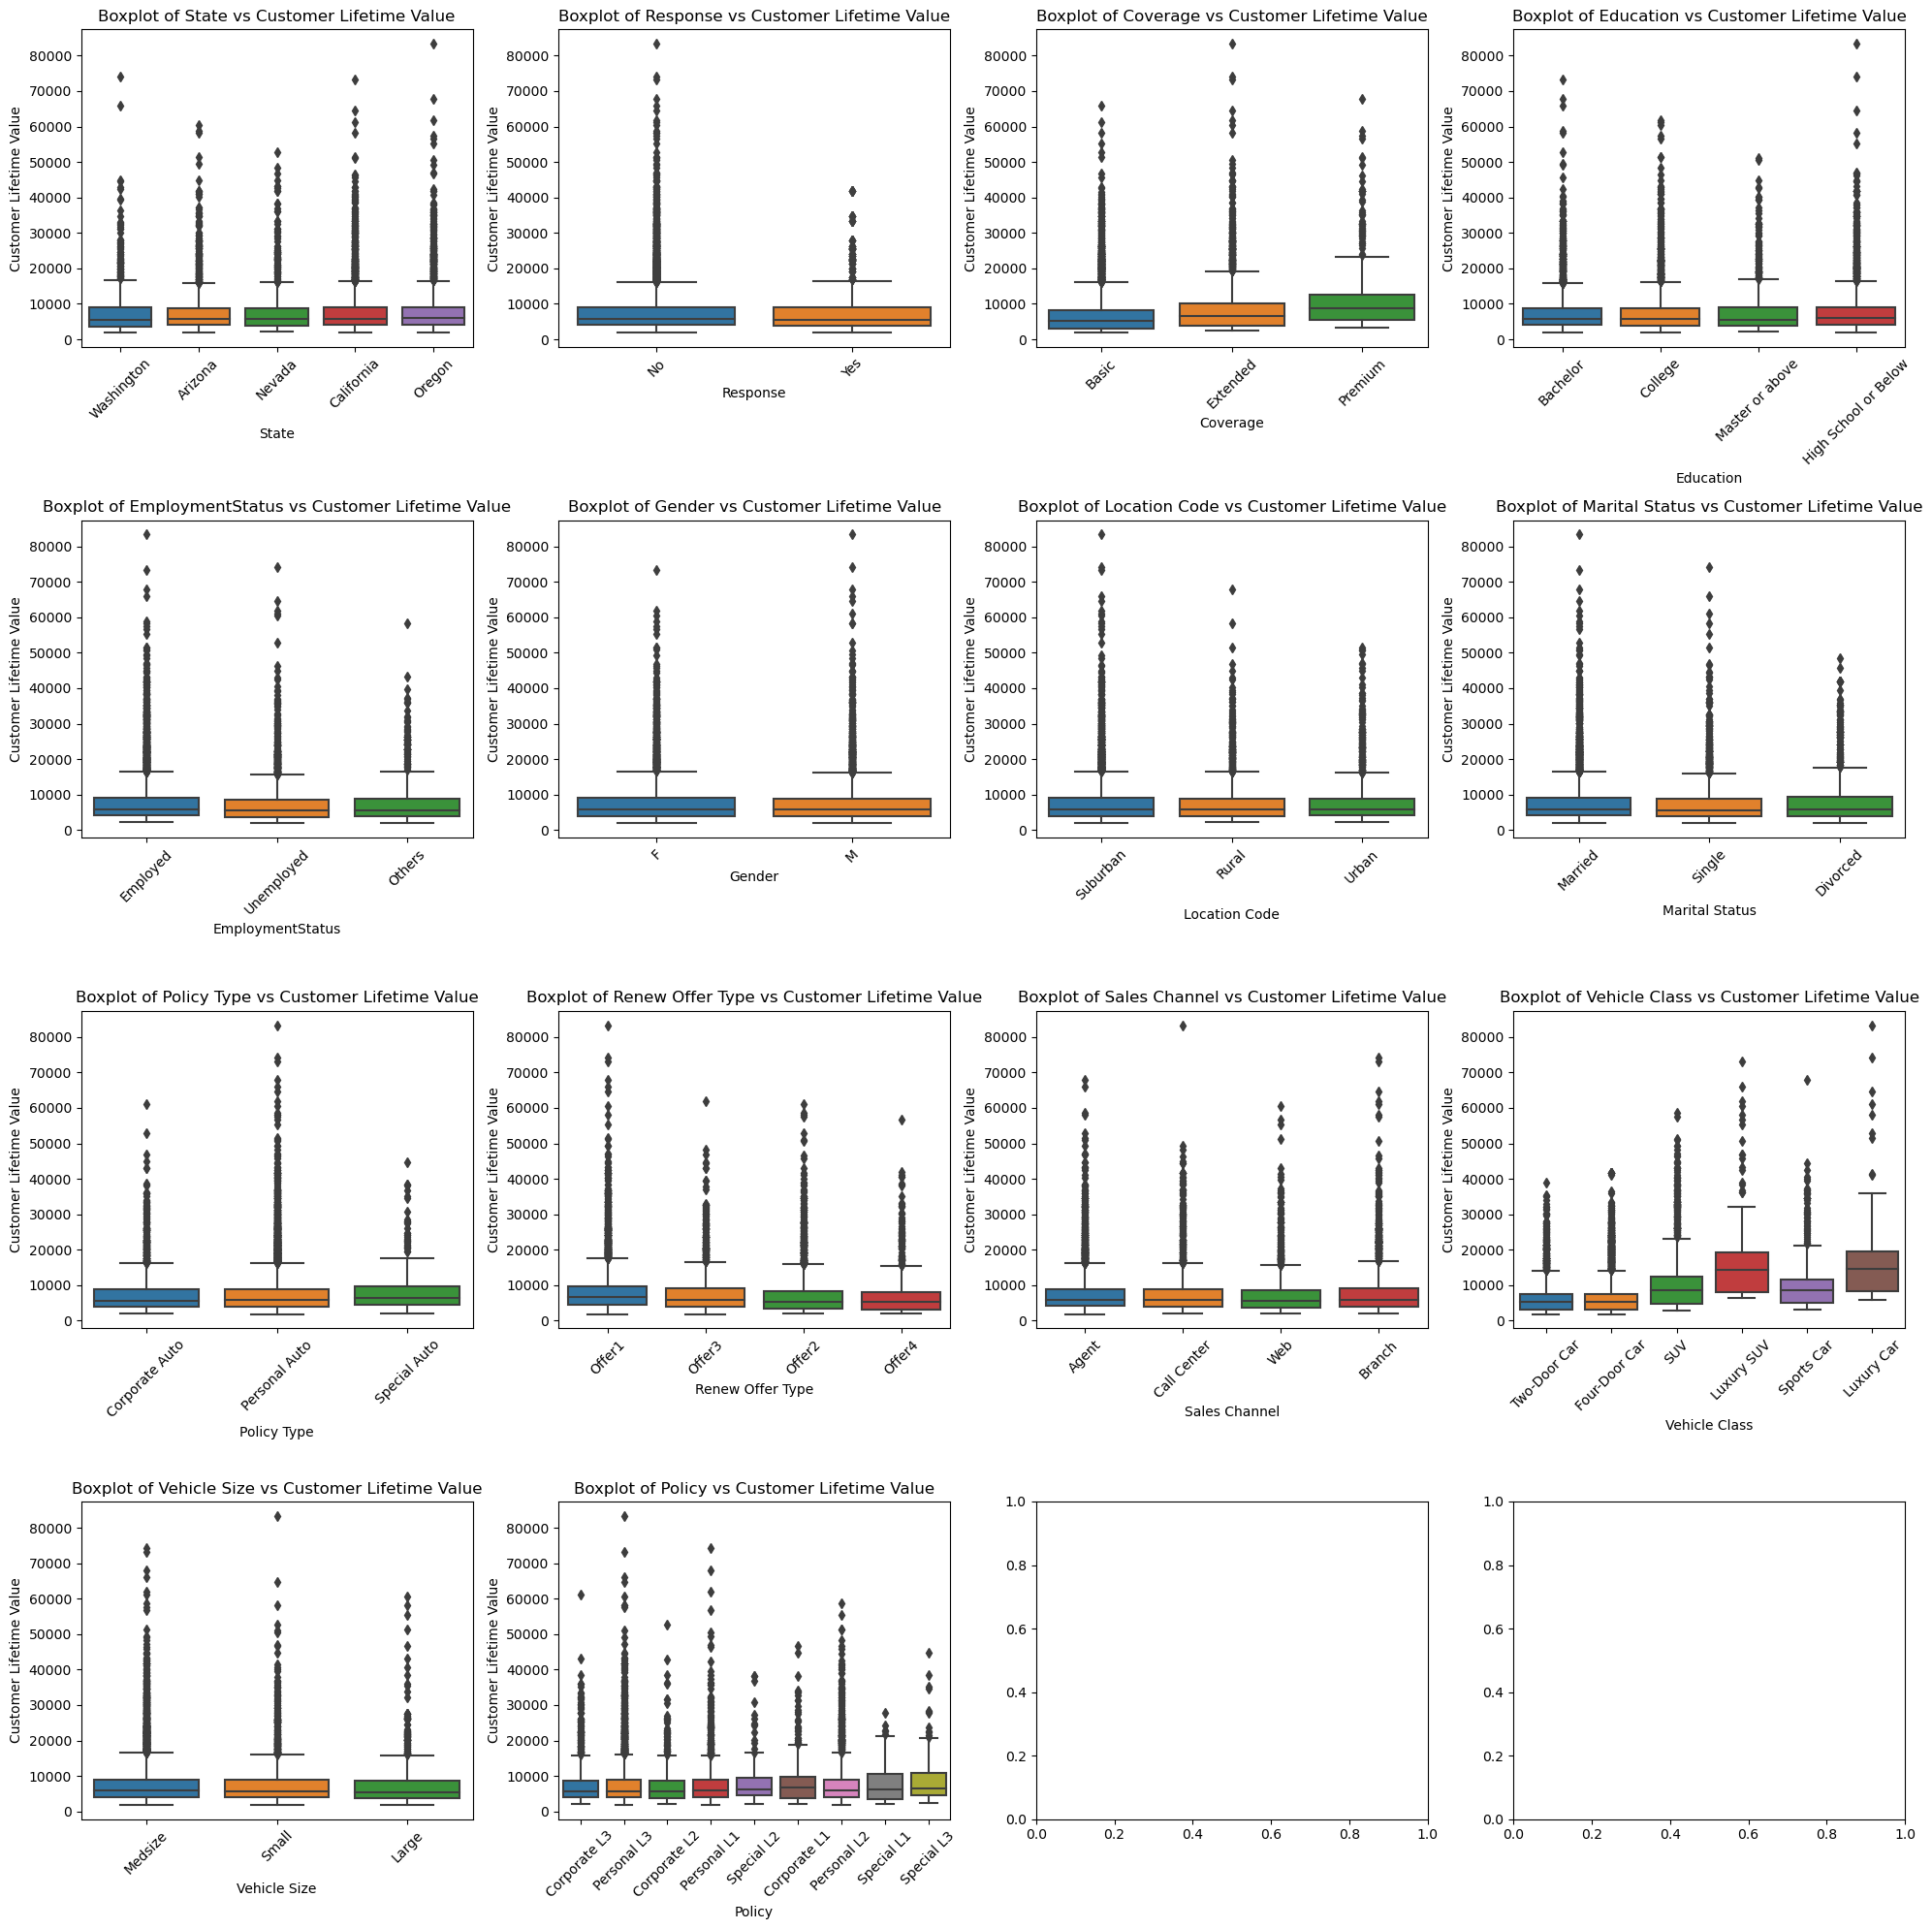

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='Customer Lifetime Value', data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} vs Customer Lifetime Value')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Customer Lifetime Value')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Comparing to see if the average CLV in sub categories are mostly similar as shown by boxplot

In [53]:
import pandas as pd
from tabulate import tabulate

categorical_vars = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
                    'Location Code', 'Marital Status', 'Policy Type', 
                    'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Policy']

# Grouping by the categorical variable 'Category'
grouped = data.groupby(categorical_vars)

target_column = 'Customer Lifetime Value'

# Dictionary to store results
summary_tables = {}

# Calculate mean and median for each categorical variable
for var in categorical_vars:
    summary_table = data.groupby(var)[target_column].agg(['mean', 'median']).reset_index()
    summary_tables[var] = summary_table

# Display the summary tables
for var, table in summary_tables.items():
    print(f"Summary table for {var}:")
    print(tabulate(table, headers='keys', tablefmt='fancy_grid'))
    print()

Summary table for State:
╒════╤════════════╤═════════╤══════════╕
│    │ State      │    mean │   median │
╞════╪════════════╪═════════╪══════════╡
│  0 │ Arizona    │ 7861.34 │  5790.57 │
├────┼────────────┼─────────┼──────────┤
│  1 │ California │ 8003.65 │  5871.39 │
├────┼────────────┼─────────┼──────────┤
│  2 │ Nevada     │ 8056.71 │  5629.95 │
├────┼────────────┼─────────┼──────────┤
│  3 │ Oregon     │ 8077.9  │  5905.97 │
├────┼────────────┼─────────┼──────────┤
│  4 │ Washington │ 8021.47 │  5502.08 │
╘════╧════════════╧═════════╧══════════╛

Summary table for Response:
╒════╤════════════╤═════════╤══════════╕
│    │ Response   │    mean │   median │
╞════╪════════════╪═════════╪══════════╡
│  0 │ No         │ 8030.02 │  5814.15 │
├────┼────────────┼─────────┼──────────┤
│  1 │ Yes        │ 7854.87 │  5596.26 │
╘════╧════════════╧═════════╧══════════╛

Summary table for Coverage:
╒════╤════════════╤══════════╤══════════╕
│    │ Coverage   │     mean │   median │
╞════╪═══════

Based on the boxplots and the summary table above the mean values of most classes within each variable are similar except Vehicle Class. Therefore, the outliers in the data do not disproportionately influence the means. 

Only in vehicle class there is a difference in the means of the different vehicle classes. 

## Relation between variables and CLV

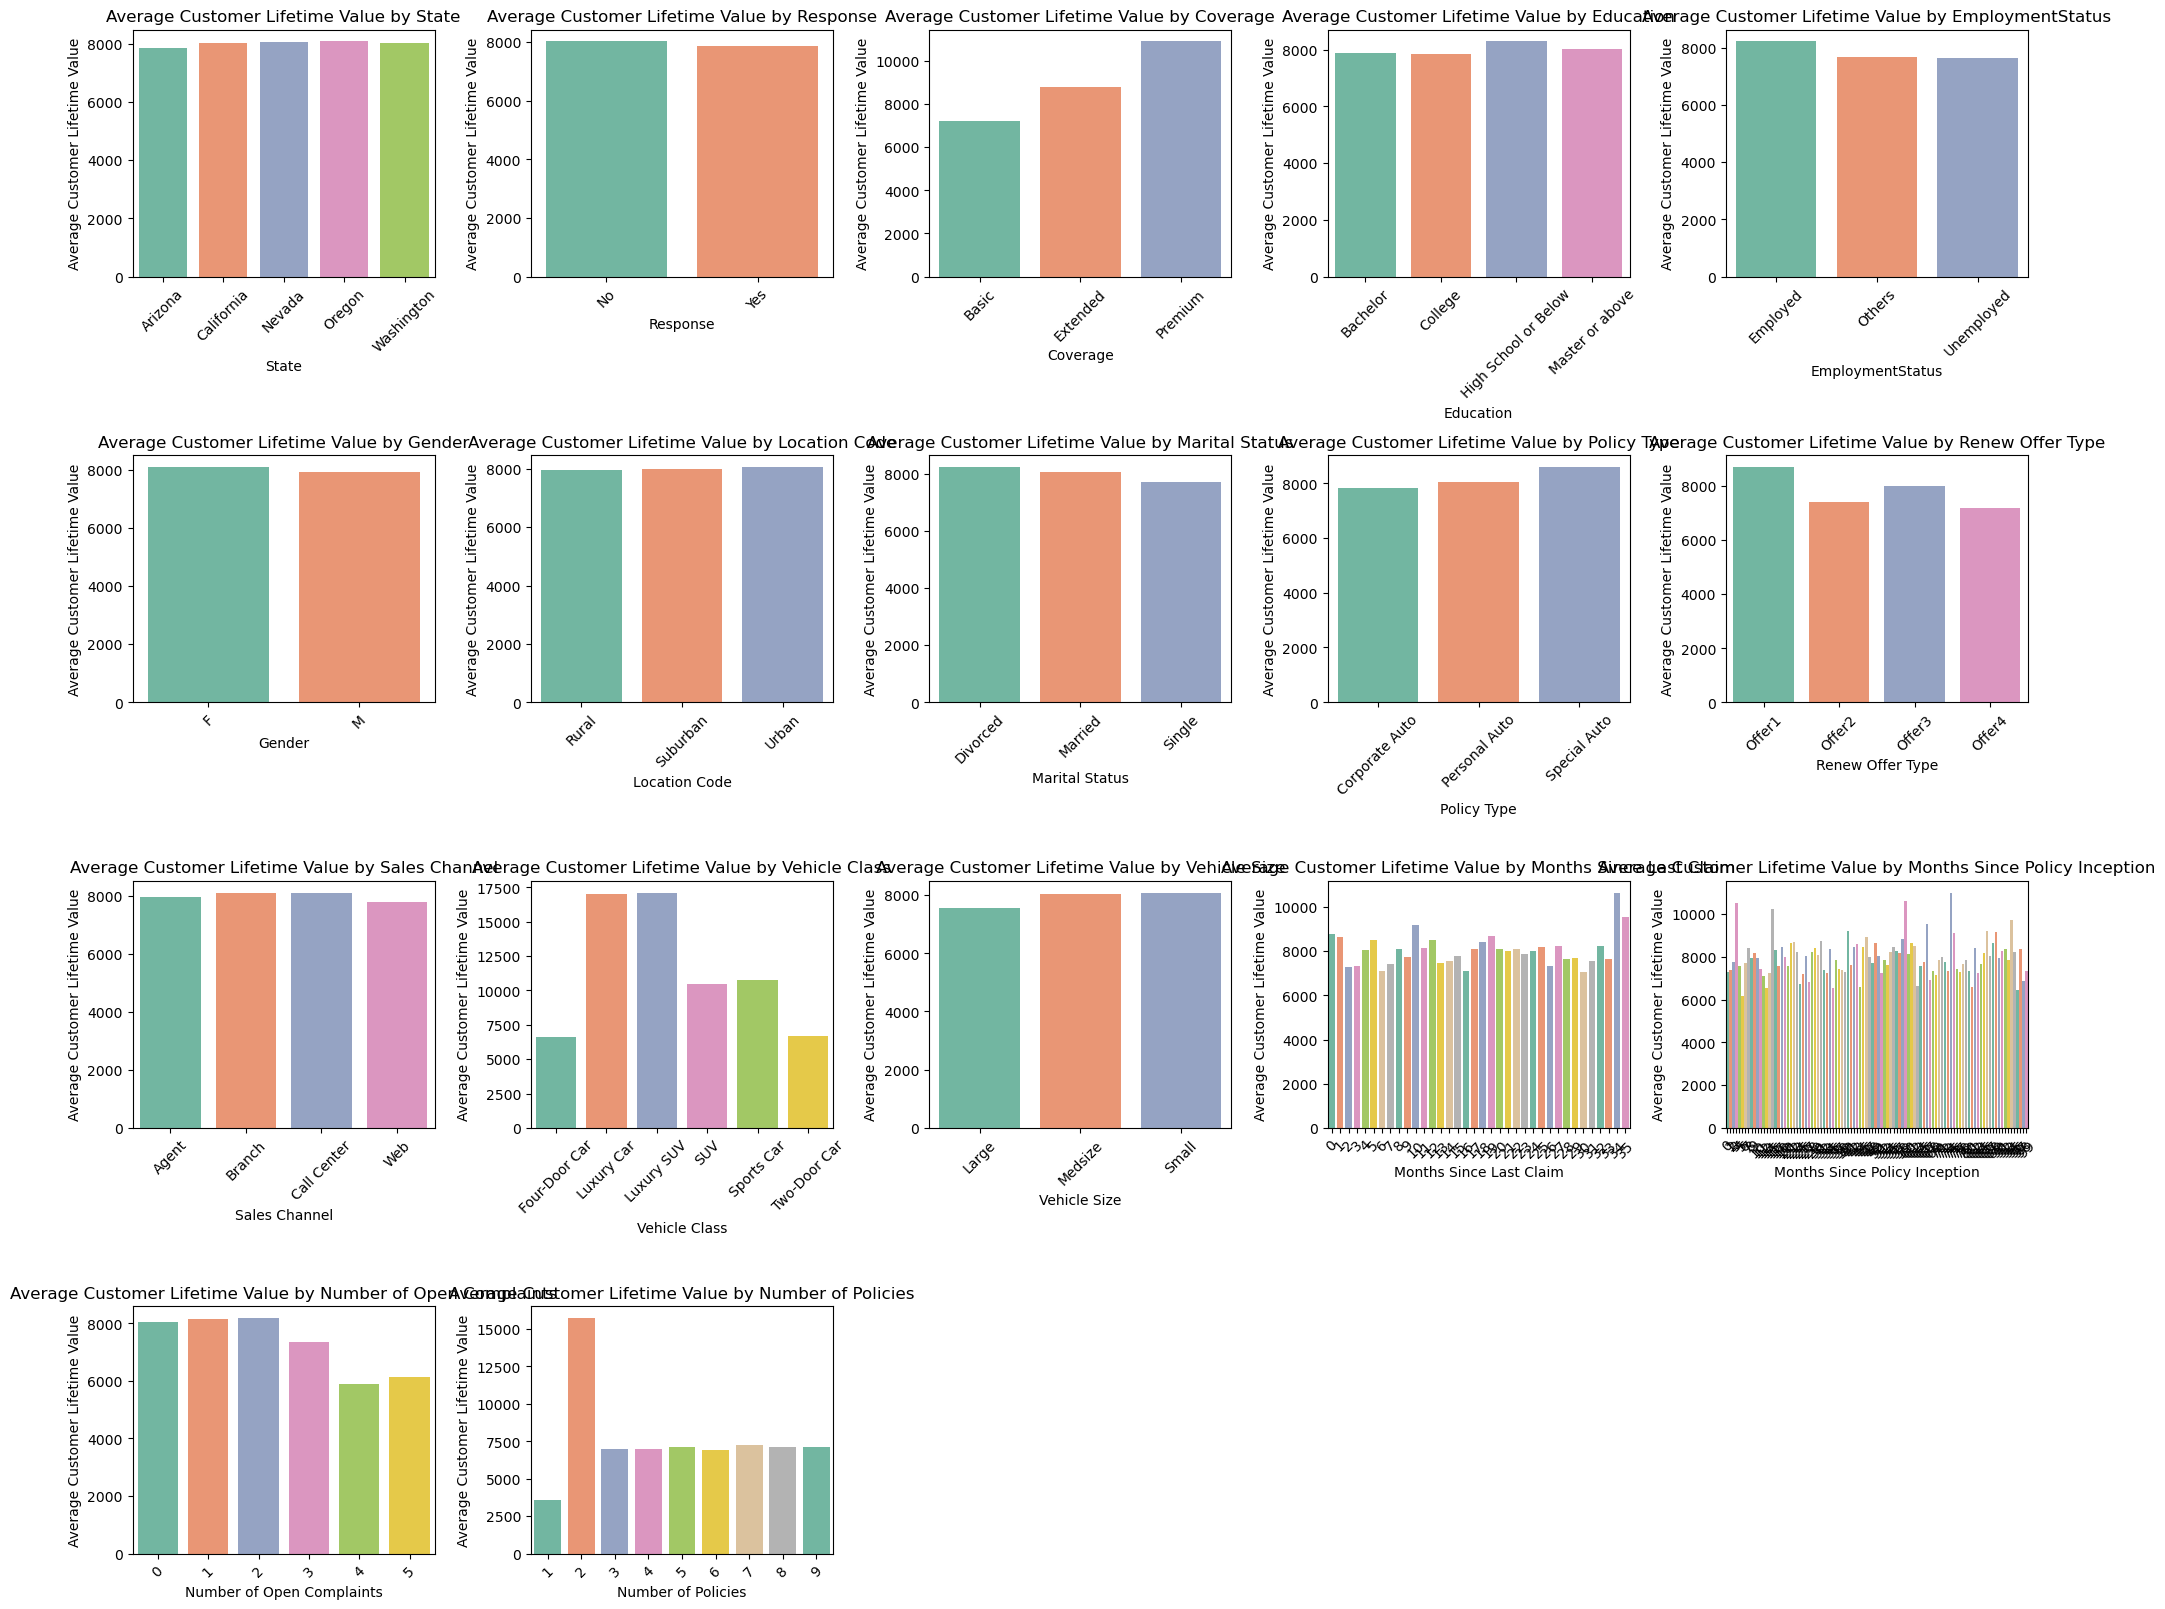

In [54]:
variables = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
             'Location Code', 'Marital Status', 'Policy Type', 'Renew Offer Type', 
             'Sales Channel', 'Vehicle Class', 'Vehicle Size',  'Months Since Last Claim', 
                  'Months Since Policy Inception', 'Number of Open Complaints', 
                  'Number of Policies']


# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

axes = axes.flatten()

for i, var in enumerate(variables):
    avg_clv_by_var = data.groupby(var)['Customer Lifetime Value'].mean().reset_index()
    
    # Plot
    sns.barplot(data=avg_clv_by_var, x=var, y='Customer Lifetime Value', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Average Customer Lifetime Value by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Average Customer Lifetime Value')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Based on the plots above, we can see which classes influence the CLV the most. The following characteristics result in higher CLV:
- Premium Coverage
- Special Auto Policy
- Offer1 by Offer Type
- Luxury cars and luxury SUVs by vehicle class
- Fewer open complaints
- mostly 2 policies (number of policies)

Below you can also see the relation with some of the numerical variables. We can see that there is a linear relationship between CLV and Monthly Premium Auto. Total Claim Amount and CLV also have a relatively linear relationship.

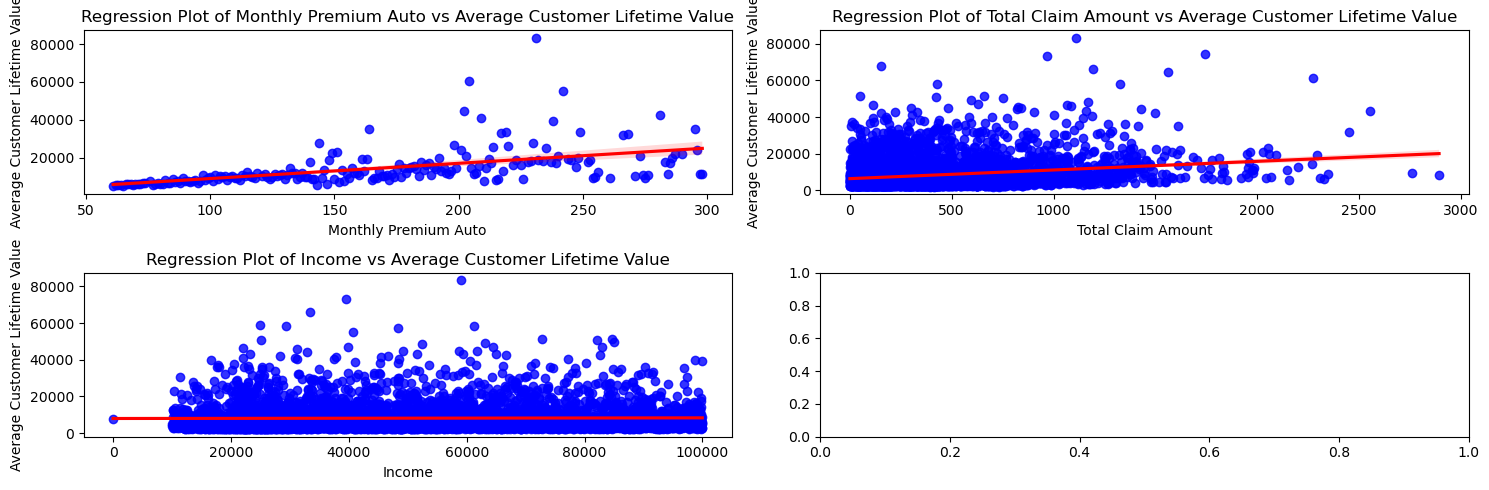

In [55]:
numerical_vars = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    avg_clv_by_var = data.groupby(var)['Customer Lifetime Value'].mean().reset_index()
    
    sns.regplot(data=avg_clv_by_var, x=var, y='Customer Lifetime Value', ax=axes[i], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    
    axes[i].set_title(f'Regression Plot of {var} vs Average Customer Lifetime Value')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Average Customer Lifetime Value')

plt.tight_layout()
plt.show()

Let's also look at the correlations between features.

In [56]:
data_factor = data.drop(['Customer', 'Effective To Date', 'Log_CLV', 'Log_Monthly Premium Auto'], axis=1)

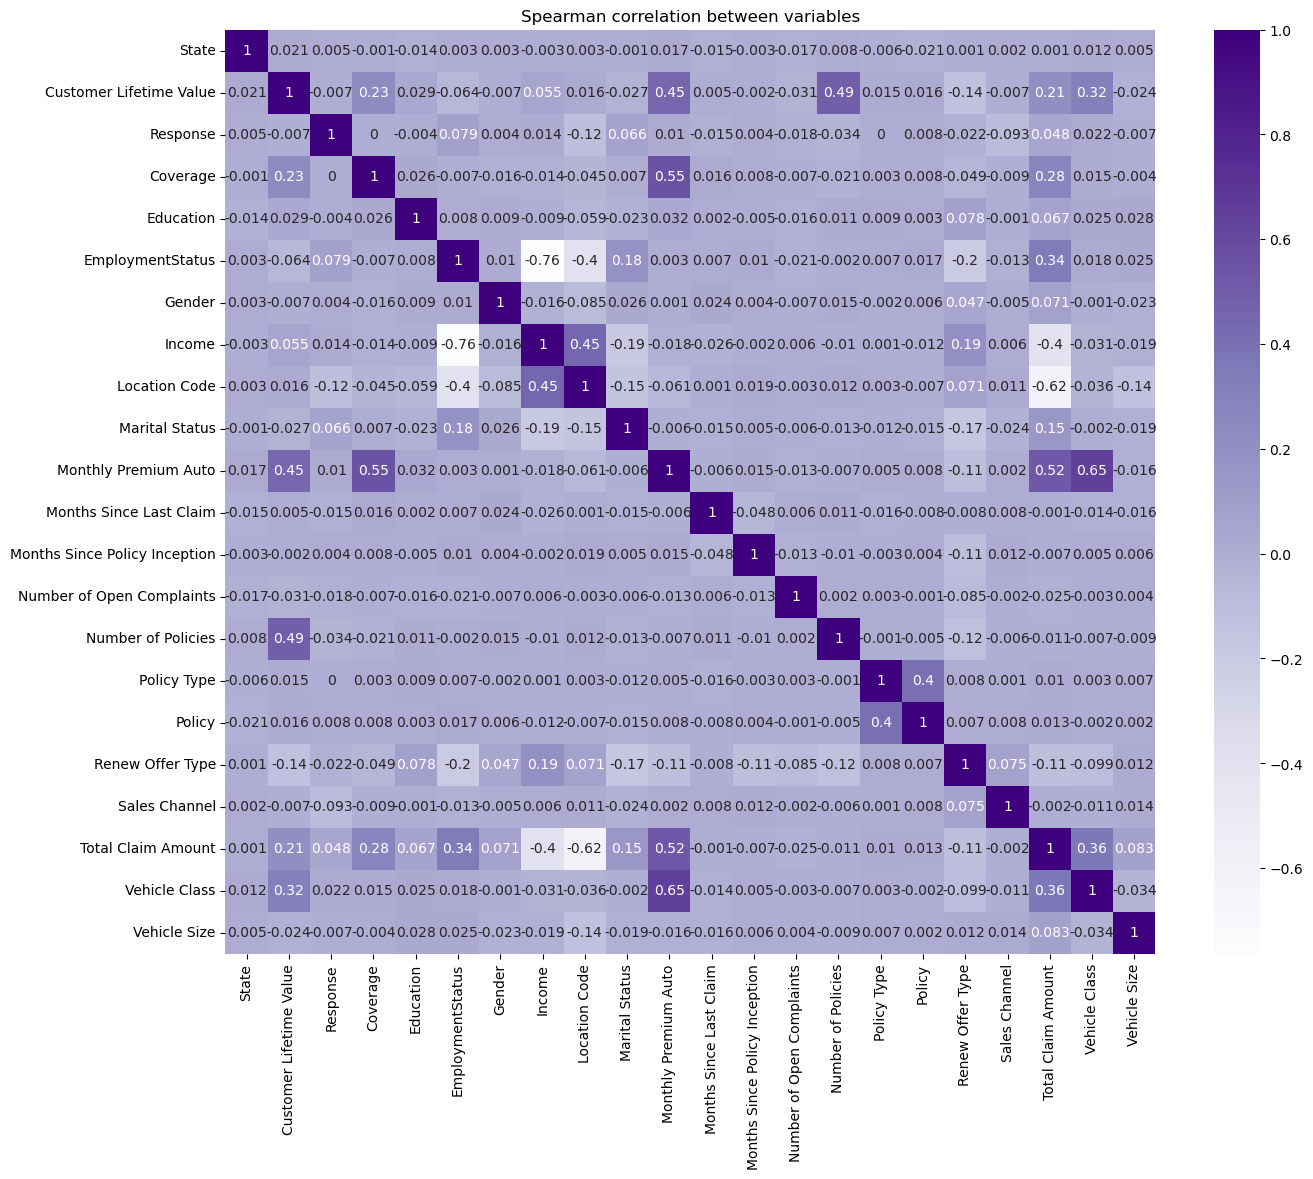

In [57]:
# Factorizing the categorical columns to see the correlation matrix
import seaborn as sns
import matplotlib.pyplot  as plt

categorical_cols = data_factor.select_dtypes(include=['object']).columns

# Apply label encoding to categorical variables
for col in categorical_cols:
    data_factor[col] = pd.factorize(data_factor[col])[0]
    
data_corr =  data_factor.corr('spearman').round(3)

plt.figure(figsize=(15,12))
ax = sns.heatmap(data_corr, annot=True, cmap = 'Purples')
plt.title("Spearman correlation between variables")
plt.show()

#https://www.kaggle.com/code/rock810928/eda-customer-segmentation-analysis

Positive Correlations
- CLV and Monthly Premium Auto
- CLV and Number of Policies
- CLV and Total Claim Amount
- CLV and Income
- CLV and Coverage
- CLV and Vehicle Class

- Coverage and Total Claim Amount
- Employment Status and Total Claim Amount
- Vehicle Class and Total Claim Amount

- Monthly Premium Auto and Vehicle Class
- Monthly Premium Auto and Total Claim Amount
- Monthly Premium Auto and Coverage


Negative Correlations
- CLV and Response
- Income and Emplyment Status
- Location Code and Employment Status
- Income and Total Claim Amount

### Other descriptive insights 

In [58]:
# No duplicate customers

duplicate_customers = data[data.index.duplicated(keep=False)]

if duplicate_customers.empty:
    print("All customer IDs are unique.")
else:
    print("Duplicate customer IDs found:")
    print(duplicate_customers)

All customer IDs are unique.


In [59]:
import pandas as pd

exclude_columns = ['Effective To Date']

columns_to_describe = [col for col in data.columns if col not in exclude_columns]
description = data[columns_to_describe].describe()
description

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Log_CLV,Log_Monthly Premium Auto
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,8.748753,4.494058
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.652816,0.304920
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,7.549087,4.127134
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,8.292862,4.234107
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,8.662363,4.430817
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,9.100879,4.700480
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,11.330520,5.700444


### Variable Importance
#### Statistical significance test

In [60]:
from scipy.stats import pearsonr, f_oneway

    
# Define the numerical variables
numerical_vars = ['Monthly Premium Auto', 'Income','Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']  

numerical_p_values = {}

for var in numerical_vars:
    correlation, p_value = pearsonr(data[var], data['Customer Lifetime Value'])
    numerical_p_values[var] = p_value

for var, p_value in numerical_p_values.items():
    print(f'{var}: Pearson correlation p-value = {p_value}')

# Define the categorical variables
categorical_vars = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 
                    'Location Code', 'Marital Status', 'Policy Type', 
                    'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

categorical_p_values = {}

for var in categorical_vars:
    anova_results = []
    categories = data[var].unique()
    for category in categories:
        clv_category = data[data[var] == category]['Customer Lifetime Value']
        anova_results.append(clv_category)
    
    f_statistic, p_value = f_oneway(*anova_results)
    categorical_p_values[var] = p_value

for var, p_value in categorical_p_values.items():
    print(f'{var}: ANOVA p-value = {p_value}')


Monthly Premium Auto: Pearson correlation p-value = 0.0
Income: Pearson correlation p-value = 0.01987491095466721
Months Since Last Claim: Pearson correlation p-value = 0.27108918418866784
Months Since Policy Inception: Pearson correlation p-value = 0.368104314352876
Number of Open Complaints: Pearson correlation p-value = 0.0005126415235317524
Number of Policies: Pearson correlation p-value = 0.03588015369142608
Total Claim Amount: Pearson correlation p-value = 1.5070381071242301e-106
State: ANOVA p-value = 0.8955985932127517
Response: ANOVA p-value = 0.39348303047730904
Coverage: ANOVA p-value = 6.0158970099807e-58
Education: ANOVA p-value = 0.0689520484005329
EmploymentStatus: ANOVA p-value = 0.0006255767383114745
Gender: ANOVA p-value = 0.193398656308463
Location Code: ANOVA p-value = 0.8976268526407198
Marital Status: ANOVA p-value = 0.036281036735873
Policy Type: ANOVA p-value = 0.11268909882175004
Renew Offer Type: ANOVA p-value = 1.238399930571374e-16
Sales Channel: ANOVA p-val

Based on the results above we can look at the statistical significance of each variable.
A lower p-value means a more statistically significant result.

Among the numerical variables, we can see that the ones that have a statistically significant correlation with CLV are the following:
- Monthly Premium Auto
- Number of Open Complaints
- Number of Policies
- Total Claim Amount
- Income

Moderately correlated are Months Since Last Claim, Months Since Policy Inception.

Among the categorical variables, we can see that there is a statistically significant difference among the different classes within each variable:
- Coverage
- Employment Status
- Marital Status
- Renew Offer Type
- Vehicle Class

No significant correlation: State, Response, Education, Gender, Location Code, Policy Type, Sales Channel, Vehicle Size.


Overall, variables mostly from the policy group seem to be more important.

## Data preprocessing

We have used one-hot encoding to convert the categorical variables to numerical values.

In [61]:
data_encoded = pd.get_dummies(data, columns=['State', 'Response','Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Location Code', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class','Vehicle Size'])
data_encoded.head()

,Customer,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,2763.519279,2/24/11,56274,69,32,5,0,1,384.811147,...,0,0,0,0,0,0,1,0,1,0
1,QZ44356,6979.535903,1/31/11,0,94,13,42,0,8,1131.464935,...,0,1,0,0,0,0,0,0,1,0
2,AI49188,12887.431650,2/19/11,48767,108,18,38,0,2,566.472247,...,0,0,0,0,0,0,1,0,1,0
3,WW63253,7645.861827,1/20/11,0,106,18,65,0,7,529.881344,...,0,0,0,0,1,0,0,0,1,0
4,HB64268,2813.692575,2/3/11,43836,73,12,44,0,1,138.130879,...,0,1,0,0,0,0,0,0,1,0


Initially, we are dropping the 'Customer' and 'Effective To Date' columns as they don't bring any important infromation. 'Customer' is simply the customer ID in the database and 'Effective To Date' is the final date to which the policy is effective. Since we do not know the beginning date, this column also doesn't bring any value to our analysis. The other two columns that we are dropping are the log variables that we transformed in the beginning.

In [62]:
data_encoded = data_encoded.drop(columns = ['Customer', 'Effective To Date', 'Log_CLV', 'Log_Monthly Premium Auto'])
data_encoded.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0


Afterward, we have applied standardization to the numerical variables.

In [63]:
# using standardization on the numerical variables as it is more robust to outliers
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
num_vars = ['Customer Lifetime Value','Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']  
numerical_data = data_encoded[num_vars]

data_encoded[num_vars] = scaler.fit_transform(numerical_data)
data_encoded.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,0,1,...,0,0,0,0,1,0,0,0,1,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,0,0,...,0,1,0,0,0,0,0,0,1,0
